# Regression Analysis
This notebook performs regression analysis using a car price dataset from Kaggle.

## Step 1: Read Dataset
Please download the [Car Price Prediction Dataset](https://www.kaggle.com/datasets/ngawangchoeda/car-price-dataset).

Use the following code cell to read the dataset.

In [13]:
import pandas as pd

df = pd.read_csv("CarPrice.csv")
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


## Step 2: Data Preprocessing
We will extract numerical features and select a subset for modeling.

In [20]:
# Selecting relevant features
features = ['enginesize', 'horsepower', 'curbweight', 'highwaympg']
target = 'price'
df = df[features + [target]].dropna()

# Import train_test_split from sklearn.model_selection
from sklearn.model_selection import train_test_split

# Sampling 100 random rows
sample_data = df.sample(100, random_state=42)

# Splitting the train and test data (20% test / 80% train)
train_data, test_data = train_test_split(sample_data, test_size=0.2, random_state=42)
X_train, y_train = train_data[features], train_data[target]
X_test, y_test = test_data[features], test_data[target]

## Step 3: Univariate Regression
Univariate regression uses only one feature. Here, we use 'horsepower' as our feature.

In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import numpy as np

# Using 'horsepower' as the single feature against 'price'
X_uni = X_train[['horsepower']].values
y_uni = y_train.values

# Linear Regression
lin_reg = LinearRegression()
lin_reg.fit(X_uni, y_uni)
y_lin_pred = lin_reg.predict(X_uni)

# Polynomial Regression (degree 2)
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X_uni)
poly_reg = LinearRegression()
poly_reg.fit(X_poly, y_uni)
y_poly_pred = poly_reg.predict(X_poly)

## Step 4: Visualization

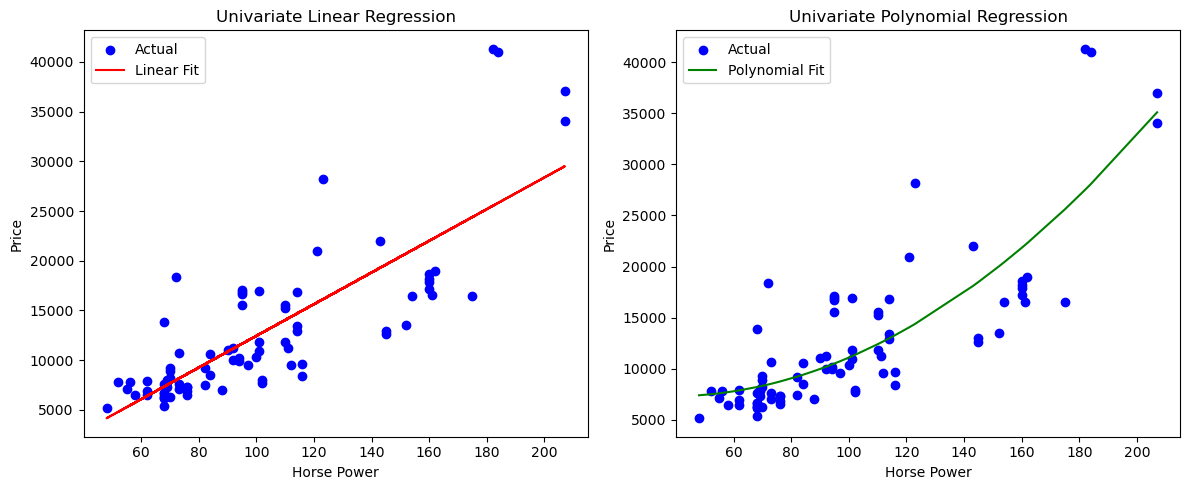

In [30]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))

# Linear regression
plt.subplot(1, 2, 1)
plt.scatter(X_uni, y_uni, color='blue', label='Actual')
plt.plot(X_uni, y_lin_pred, color='red', label='Linear Fit')
plt.xlabel('Horse Power')
plt.ylabel('Price')
plt.title('Univariate Linear Regression')
plt.legend()

# Polynomial Regression
plt.subplot(1, 2, 2)
sorted_idx = np.argsort(X_uni.flatten())
plt.scatter(X_uni, y_uni, color='blue', label='Actual')
plt.plot(X_uni[sorted_idx], y_poly_pred[sorted_idx], color='green', label='Polynomial Fit')
plt.xlabel('Horse Power')
plt.ylabel('Price')
plt.title('Univariate Polynomial Regression')
plt.legend()

plt.tight_layout()
plt.show()

## Step 5: Multiple Linear Regression
We will develop a linear regression model using multiple features, unlike the univariate setting.

In [26]:
# Import LinearRegression and r2_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Applying Multiple Linear Regression
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Calculating R-squared on test data 
y_pred_linear = linear_model.predict(X_test)
r2_linear = r2_score(y_test, y_pred_linear)

print(f"The R-squared metric for MLP model is: {r2_linear*100:.2f} %")

The R-squared metric for MLP model is: 87.87 %


## Step 6: Polynomial Regression
Finally, we develop a Polynomial Regression with multiple features.

In [31]:
# Import PolynomialFeatures from sklearn.preprocessing
from sklearn.preprocessing import PolynomialFeatures

# Applying Polynomial Regression
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X_train)
poly_model = LinearRegression()
poly_model.fit(X_poly, y_train)

# Calculating R-squared on test data 
y_pred_poly = poly_model.predict(poly.transform(X_test))
r2_poly = r2_score(y_test, y_pred_poly)

print(f"The R-squared metric for Polynomial Regression model is: {r2_poly*100:.2f} %")

The R-squared metric for Polynomial Regression model is: 89.54 %


Clearly, using R-squared metric, the Polynomial Regression is a superior model.